In [36]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchinfo import summary
import torch.nn.functional as F

In [37]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

labels_map = {
    0: "Zero",
    1: "One",
    2: "Two",
    3: "Three",
    4: "Four",
    5: "Five",
    6: "Six",
    7: "Seven",
    8: "Eight",
    9: "Nine",
}
batch_size = 16
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [38]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 8, 3)
        self.pool = torch.nn.MaxPool2d(2, 2)
        self.conv2 = torch.nn.Conv2d(8, 4, 3)
        
        self.fc1 = torch.nn.Linear(4 * 5 * 5, 32)
        self.fc2 = torch.nn.Linear(32, 10)
        self.fc3 = torch.nn.Linear(10, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [39]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), .001)

<ipython-input-40-2106b7a908c6>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


Average loss for batch #1000: 2.9319303035736084
Average loss for batch #2000: 2.2157156467437744
Average loss for batch #3000: 2.6370022296905518
Epoch #1, average sample loss = 4.226739552164077
Average loss for batch #1000: 0.8665105104446411
Average loss for batch #2000: 0.8296507596969604
Average loss for batch #3000: 1.0085437297821045
Epoch #2, average sample loss = 1.368878791117668
Average loss for batch #1000: 0.5968368053436279
Average loss for batch #2000: 0.40047264099121094
Average loss for batch #3000: 0.6036129593849182
Epoch #3, average sample loss = 0.9812116929481427
Average loss for batch #1000: 1.1169955730438232
Average loss for batch #2000: 0.7400118112564087
Average loss for batch #3000: 0.9786993265151978
Epoch #4, average sample loss = 0.8211025199164946
Average loss for batch #1000: 0.957200288772583
Average loss for batch #2000: 0.4325529634952545
Average loss for batch #3000: 0.9169826507568359
Epoch #5, average sample loss = 0.7337489267160495
Average loss

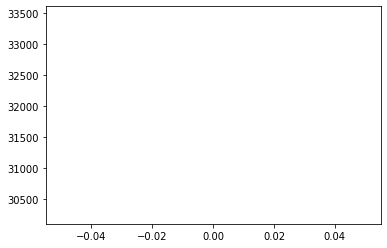

In [40]:
epochs = 10
num_samples = len(train_dataloader.dataset)
losses = []

for epoch in range(epochs):
    total_loss = 0
    for batch, (X,y) in enumerate(train_dataloader):
        pred = net(X)
        y = torch.reshape(y, (-1,1))
        y = torch.tensor(y, dtype=torch.float32)
        loss = loss_fn(pred, y)
        total_loss += loss.item() * len(X)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (batch + 1) % 1000 == 0:
            print(f'Average loss for batch #{batch+1}: {loss}')
            
    print(f'Epoch #{epoch +1}, average sample loss = {total_loss/num_samples}')
    losses.append(total_loss/num_samples)

plt.plot(total_loss)
plt.show()

In [49]:
def test_model(index):
    image, label = training_data.__getitem__(index)
    image = torch.unsqueeze(image, 0)
    # print(image.shape)
    print(f'True label: {label}')
    plt.imshow(image[0][0], cmap = 'gray')
    
    pred = net(image) 
    print(f'Pred label: {round(pred.item())}')
    plt.show()

True label: 3
Pred label: 3


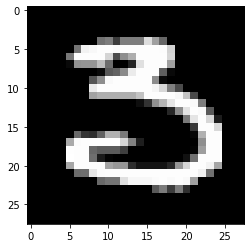

In [55]:
test_model(670)